In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
import re

# Geneva timeline

In [76]:
# Original data + new file
data = [
    ("Lubières", 1760, 1769),
    ("Deluc", 1767, 1772),
    ("Deluc", 1773, 1776),
    ("Deluc", 1777, 1781),
    ("Deluc", 1782, 1787),
    ("Deluc", 1788, 1793),
    ("Deluc", 1794, 1800),
    ("Avully", 1778, 1786),
    ("Genthod", 1789, 1795),
    ("Palatina", 1782, 1789),
    ("DigiHom", 1796, 1863)
]

df = pd.DataFrame(data, columns=["Observer", "Start", "End"])

# Merge overlapping or consecutive periods for each observer
merged = []
for name, group in df.groupby("Observer"):
    group = group.sort_values("Start")
    start, end = group.iloc[0][["Start", "End"]]
    for _, row in group.iloc[1:].iterrows():
        if row["Start"] <= end + 1:
            end = max(end, row["End"])
        else:
            merged.append((name, start, end))
            start, end = row["Start"], row["End"]
    merged.append((name, start, end))

merged_df = pd.DataFrame(merged, columns=["Observer", "Start", "End"])
merged_df = merged_df.sort_values("Start").reset_index(drop=True)

merged_df.head()

,Observer,Start,End
0,Lubières,1760,1769
1,Deluc,1767,1800
2,Avully,1778,1786
3,Palatina,1782,1789
4,Genthod,1789,1795


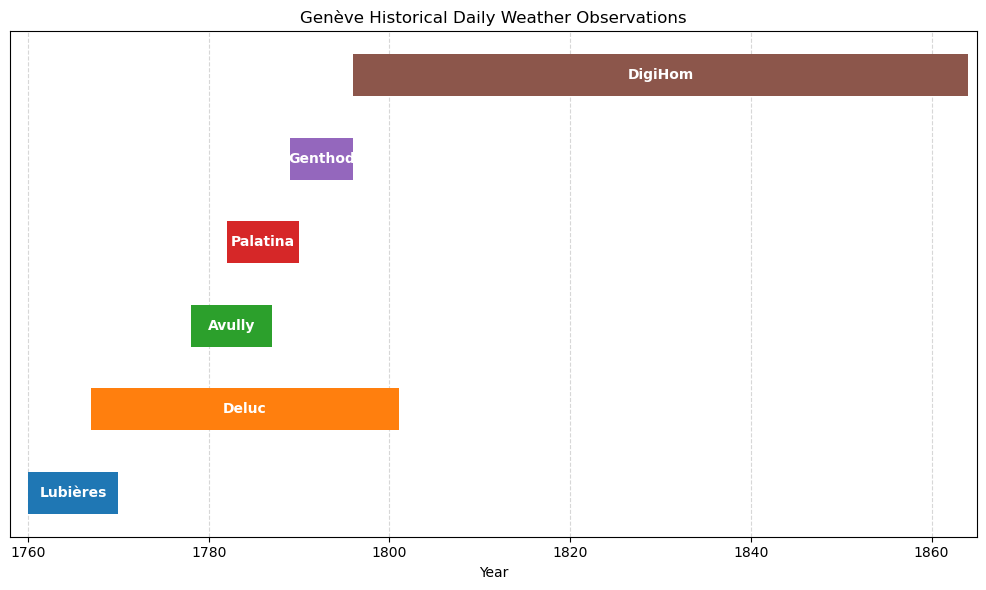

In [79]:
# Plot timeline
fig, ax = plt.subplots(figsize=(10, 6))
y_positions = range(len(merged_df))
for y, row in zip(y_positions, merged_df.itertuples(index=False)):
    ax.barh(y, row.End - row.Start + 1, left=row.Start, height=0.5)
    ax.text((row.Start + row.End) / 2 + .5, y, row.Observer, va="center", ha="center", 
            weight="bold", color="white", fontsize=10)

ax.grid(True, axis="x", linestyle="--", alpha=0.5)
ax.set_axisbelow(True)


ax.set_yticks([])
ax.set_xlabel("Year")
ax.set_xlim(1758, 1865)
ax.set_title("Genève Historical Daily Weather Observations")
plt.tight_layout()
plt.savefig("geneva_observers_timeline.png", dpi=300)
plt.show()


# Zurich timeline

In [80]:
dir = "/scratch3/PALAEO-RA/daily_data/original/Zurich/"
files = [f for f in os.listdir(dir) if f.endswith((".xlsx", ".xls"))]
data = [
    ("Scheuchzer", 1731, 1733),
    ("Meyer", 1761, 1762),
    ("Muralt", 1760, 1769),
    ("Muralt", 1760, 1793),
    ("Hirzel", 1770, 1774),
    ("Hirzel", 1775, 1780),
    ("Hirzel", 1781, 1786),
    ("Muralt", 1781, 1785),
    ("Muralt", 1787, 1793),
    ("Hirzel", 1795, 1802),
    ("Feer", 1807, 1810),
    ("Feer", 1811, 1814),
    ("Feer", 1815, 1818),
    ("Feer", 1819, 1822),
    ("Feer", 1823, 1827),
    ("Escher", 1816, 1816),
    ("Horner", 1812, 1814),
    ("Horner", 1814, 1821),
    ("Horner", 1823, 1823),
    ("Horner", 1825, 1825),  # Bleycherweg
    ("Horner", 1825, 1825),  # Muehlestein
    ("Horner", 1827, 1829),
    ("Horner", 1827, 1831),
    ("Horner", 1830, 1830),
    ("Horner", 1832, 1834),
    ("Horner", 1835, 1835),
    ("Hofmeister", 1834, 1834),
    ("Hofmeister", 1835, 1837),
    ("Hofmeister", 1838, 1838),
    ("Hofmeister", 1840, 1841),
    ("SNG", 1830, 1832),
    ("Weiss", 1823, 1824),
    ("NGZ", 1849, 1851),
    ("Hornig", 1851, 1852)
]

df = pd.DataFrame(data, columns=["Observer", "Start", "End"])

# Merge overlapping or consecutive periods for each observer
merged = []
for name, group in df.groupby("Observer"):
    group = group.sort_values("Start")
    start, end = group.iloc[0][["Start", "End"]]
    for _, row in group.iloc[1:].iterrows():
        if row["Start"] <= end + 1:
            end = max(end, row["End"])
        else:
            merged.append((name, start, end))
            start, end = row["Start"], row["End"]
    merged.append((name, start, end))

merged_df = pd.DataFrame(merged, columns=["Observer", "Start", "End"])
merged_df = merged_df.sort_values("Start").reset_index(drop=True)

merged_df.head()

,Observer,Start,End
0,Scheuchzer,1731,1733
1,Muralt,1760,1793
2,Meyer,1761,1762
3,Hirzel,1770,1786
4,Hirzel,1795,1802


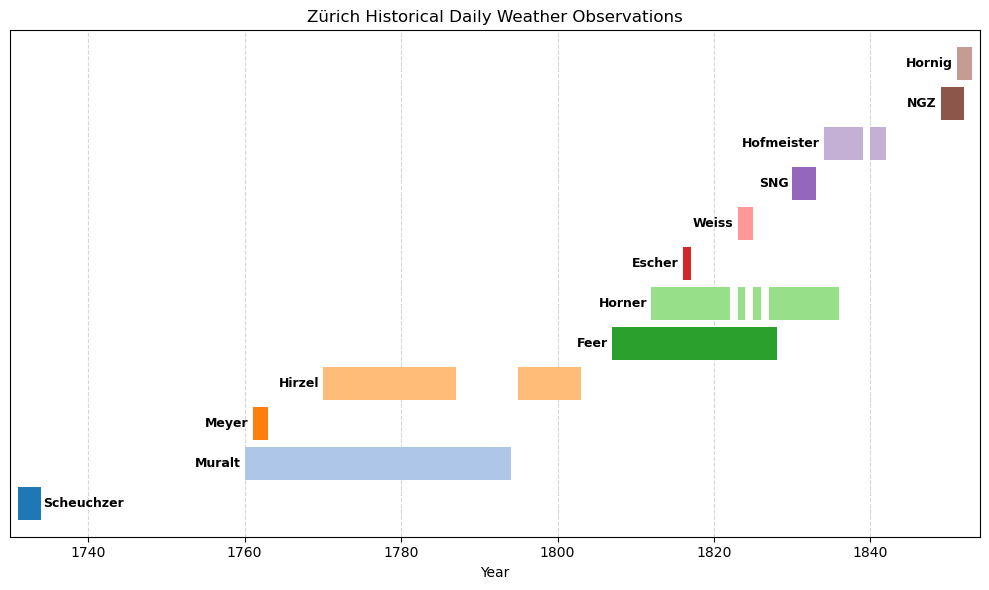

In [81]:

fig, ax = plt.subplots(figsize=(10, 6))

# assign a unique y per observer
observers = merged_df["Observer"].unique()
spacing = 0.6

y_map = {obs: i * spacing for i, obs in enumerate(observers)}

# optional: consistent colors per observer
colors = plt.cm.tab20.colors
color_map = {obs: colors[i % len(colors)] for i, obs in enumerate(observers)}

for _, row in merged_df.iterrows():
    y = y_map[row.Observer]
    ax.barh(y, row.End - row.Start + 1, left=row.Start, height=0.5,
            color=color_map[row.Observer])

# add one label per observer (except Scheuchzer on the right)
for obs in observers:
    group = merged_df[merged_df["Observer"] == obs]
    y = y_map[obs]
    start = group["Start"].min()
    end = group["End"].max()
    if obs == "Scheuchzer":
        ax.text(end + 1.25, y, obs, va="center", ha="left",
                weight="bold", color="black", fontsize=9)
    else:
        ax.text(start - 0.5, y, obs, va="center", ha="right",
                weight="bold", color="black", fontsize=9)

# set grid lines
ax.grid(True, axis="x", linestyle="--", alpha=0.5)
ax.set_axisbelow(True)

ax.set_yticks([])
ax.set_ylim(-0.5, max(y_map.values()) + 0.5)
ax.set_xlabel("Year")
ax.set_xlim(1730, 1854)
ax.set_title("Zürich Historical Daily Weather Observations")
plt.tight_layout()
plt.savefig("zurich_observers_timeline.png", dpi=300)
plt.show()

# Zurich available vars

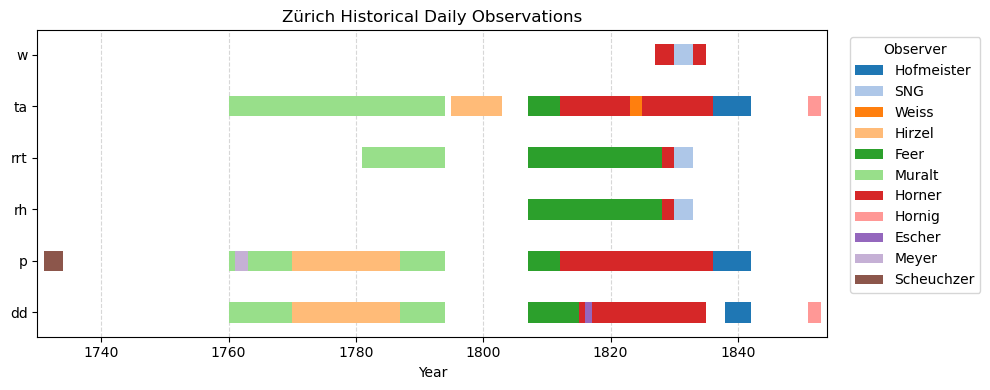

In [4]:

# --- SETTINGS ---
dir = "/scratch3/PALAEO-RA/daily_data/final/Zurich/"
files = [f for f in os.listdir(dir) if f.endswith(".tsv")]

# --- PARSE FILENAMES ---
data = []
pattern = re.compile(r"Zurich_([A-Za-z]+)_(\d{8})-(\d{8})_([A-Za-z]+)_subdaily")
for f in files:
    name = Path(f).stem
    m = pattern.search(name)
    if m:
        observer, start, end, var = m.groups()
        start_y = int(start[:4])
        end_y = int(end[:4])
        data.append((observer, var, start_y, end_y))

df = pd.DataFrame(data, columns=["Observer", "Variable", "Start", "End"])

# --- PREP FOR PLOT ---
variables = sorted(df["Variable"].unique())
y_map = {var: i for i, var in enumerate(variables)}

observers = df["Observer"].unique()
colors = plt.cm.tab20.colors
color_map = {obs: colors[i % len(colors)] for i, obs in enumerate(observers)}

# --- PLOT ---
plt.clf()
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 4))

for _, row in df.iterrows():
    y = y_map[row.Variable]
    ax.barh(y, row.End - row.Start + 1, left=row.Start, height=0.4,
            color=color_map[row.Observer], label=row.Observer)

# legend with unique observers
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),
          title="Observer", bbox_to_anchor=(1.02, 1), loc="upper left")

ax.set_yticks(list(y_map.values()))
ax.set_yticklabels(list(y_map.keys()))
ax.set_xlabel("Year")
ax.set_xlim(df["Start"].min() - 1, df["End"].max() + 2)
ax.set_title("Zürich Historical Daily Observations")
ax.grid(True, axis="x", linestyle="--", alpha=0.5)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig("zurich_observers_variables_timeline.png", dpi=300)
plt.show()
